In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('C:/csv_files/archive/input_data.csv')
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [46]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1034, 15)


In [48]:
df.count()

date             100000
price            100000
level            100000
levels           100000
rooms            100000
area             100000
kitchen_area     100000
geo_lat          100000
geo_lon          100000
building_type    100000
object_type      100000
postal_code       94878
street_id         65681
id_region        100000
house_id          75635
dtype: int64

In [50]:
df = df.drop_duplicates()
df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


In [52]:
df.count()

date             98966
price            98966
level            98966
levels           98966
rooms            98966
area             98966
kitchen_area     98966
geo_lat          98966
geo_lon          98966
building_type    98966
object_type      98966
postal_code      93873
street_id        64956
id_region        98966
house_id         74857
dtype: int64

In [54]:
df.count()

date             98966
price            98966
level            98966
levels           98966
rooms            98966
area             98966
kitchen_area     98966
geo_lat          98966
geo_lon          98966
building_type    98966
object_type      98966
postal_code      93873
street_id        64956
id_region        98966
house_id         74857
dtype: int64

In [56]:
df_cleaned = df.dropna(subset=['price', 'area', 'id_region'])
df.count()

date             98966
price            98966
level            98966
levels           98966
rooms            98966
area             98966
kitchen_area     98966
geo_lat          98966
geo_lon          98966
building_type    98966
object_type      98966
postal_code      93873
street_id        64956
id_region        98966
house_id         74857
dtype: int64

In [58]:
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

In [60]:
df_cleaned.loc[:, 'price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned.loc[:, 'area'] = pd.to_numeric(df_cleaned['area'], errors='coerce')

In [62]:
df_cleaned['price_per_m2'] = df_cleaned['price'] / df_cleaned['area']
df_cleaned.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id,price_per_m2
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0,80900.990099
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN,43939.393939
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0,125882.352941
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN,37804.878049
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0,83333.333333


In [64]:
regional_prices = df_cleaned.groupby('id_region')['price_per_m2'].mean().reset_index()

In [66]:
regional_prices.columns = ['id_region', 'avg_price_per_m2']

In [68]:
regional_prices = regional_prices.sort_values(by='avg_price_per_m2', ascending=False)

In [70]:
income_regions = pd.read_excel('C:/csv_files/tab4_zpl_2023.xlsx', sheet_name = 'с 2018')

In [72]:
income_regions = income_regions[['Регионы', 2021]]
income_regions.dropna()

,Регионы,2021
0,Российская Федерация,57244.0
1,Центральный федеральный округ,73548.0
2,Белгородская область,41775.0
3,Брянская область,35582.0
4,Владимирская область,39550.0
...,...,...
92,Амурская область,59098.0
93,Магаданская область,112852.0
94,Сахалинская область,94285.0
95,Еврейская авт.область,50075.0


In [74]:
regions_dict = {
    'Республика Адыгея': 1,
    'Республика Башкортостан': 2,
    'Республика Бурятия': 3,
    'Республика Алтай': 4,
    'Республика Дагестан': 5,
    'Республика Ингушетия': 6,
    'Кабардино-Балкарская Республика': 7,
    'Республика Калмыкия': 8,
    'Карачаево-Черкесская Республика': 9,
    'Республика Карелия': 10,
    'Республика Коми': 11,
    'Республика Марий Эл': 12,
    'Республика Мордовия': 13,
    'Республика Саха (Якутия)': 14,
    'Республика Северная Осетия - Алания': 15,
    'Республика Татарстан': 16,
    'Республика Тыва': 17,
    'Удмуртская Республика': 18,
    'Республика Хакасия': 19,
    'Чеченская Республика': 20,
    'Чувашская Республика': 21,
    'Алтайский край': 22,
    'Забайкальский край': 75,
    'Камчатский край': 41,
    'Краснодарский край': 23,
    'Красноярский край': 24,
    'Пермский край': 59,
    'Приморский край': 25,
    'Ставропольский край': 26,
    'Хабаровский край': 27,
    'Амурская область': 28,
    'Архангельская область': 29,
    'Астраханская область': 30,
    'Белгородская область': 31,
    'Брянская область': 32,
    'Владимирская область': 33,
    'Волгоградская область': 34,
    'Вологодская область': 35,
    'Воронежская область': 36,
    'Ивановская область': 37,
    'Иркутская область': 38,
    'Калининградская область': 39,
    'Калужская область': 40,
    'Кемеровская область - Кузбасс': 42,
    'Кировская область': 43,
    'Костромская область': 44,
    'Курганская область': 45,
    'Курская область': 46,
    'Ленинградская область': 47,
    'Липецкая область': 48,
    'Магаданская область': 49,
    'Московская область': 50,
    'Мурманская область': 51,
    'Нижегородская область': 52,
    'Новгородская область': 53,
    'Новосибирская область': 54,
    'Омская область': 55,
    'Оренбургская область': 56,
    'Орловская область': 57,
    'Пензенская область': 58,
    'Псковская область': 60,
    'Ростовская область': 61,
    'Рязанская область': 62,
    'Самарская область': 63,
    'Саратовская область': 64,
    'Сахалинская область': 65,
    'Свердловская область': 66,
    'Смоленская область': 67,
    'Тамбовская область': 68,
    'Тверская область': 69,
    'Томская область': 70,
    'Тульская область': 71,
    'Тюменская область': 72,
    'Ульяновская область': 73,
    'Челябинская область': 74,
    'Ярославская область': 76,
    'Москва': 77,
    'Санкт-Петербург': 78,
    'Еврейская автономная область': 79,
    'Ненецкий автономный округ': 83,
    'Ханты-Мансийский автономный округ - Югра': 86,
    'Чукотский автономный округ': 87,
    'Ямало-Ненецкий автономный округ': 89,
    'Севастополь': [92,200],
    'Республика Крым': 91
}

In [76]:
income_regions['Регионы'] = income_regions['Регионы'].map(regions_dict)
income_regions = income_regions.dropna()
income_regions

,Регионы,2021
3,32,35582.0
4,33,39550.0
5,36,40830.0
6,37,32403.0
7,40,48837.0
...,...,...
90,25,55615.0
91,27,58786.0
92,28,59098.0
93,49,112852.0


In [78]:
regional_data = pd.merge(regional_prices, income_regions, left_on='id_region', right_on = 'Регионы', how='left')
regional_data
regional_data['affordability_index'] = regional_data['avg_price_per_m2'] / regional_data[2021]
regional_data = regional_data.sort_values(by='affordability_index', ascending=False)
regional_data.head()

,id_region,avg_price_per_m2,Регионы,2021,affordability_index
9,91,84609.587446,91,38158.0,2.217349
8,23,86429.543287,23,43510.0,1.986429
3,50,120321.576515,50,64041.0,1.878821
6,47,97884.294512,47,52749.0,1.855662
5,25,100449.429009,25,55615.0,1.806157


In [80]:
regional_data = regional_data.iloc[1:]
regional_data

,id_region,avg_price_per_m2,Регионы,2021,affordability_index
8,23,86429.543287,23,43510.0,1.986429
3,50,120321.576515,50,64041.0,1.878821
6,47,97884.294512,47,52749.0,1.855662
5,25,100449.429009,25,55615.0,1.806157
17,39,74948.526924,39,41563.0,1.803251
...,...,...,...,...,...
53,76,49836.592963,NaN,NaN,NaN
56,83,49006.622517,NaN,NaN,NaN
60,44,47549.454379,NaN,NaN,NaN
63,42,46914.785143,NaN,NaN,NaN


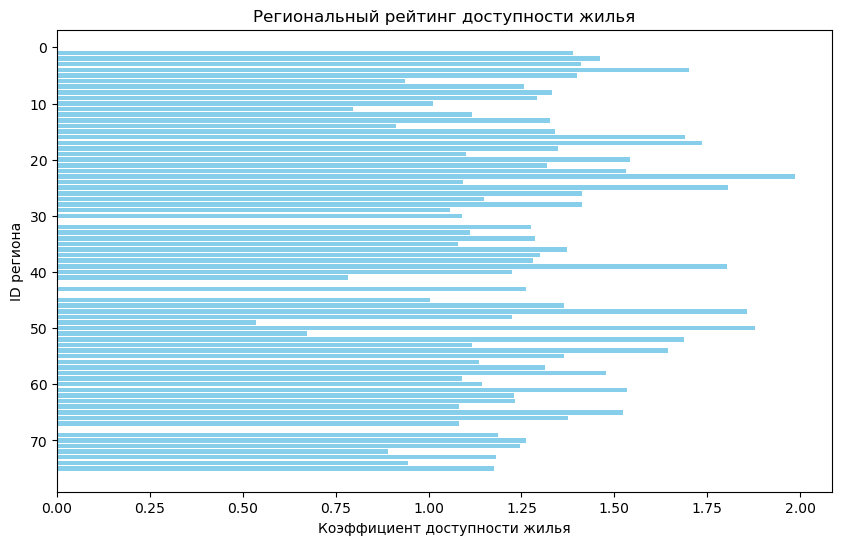

In [82]:
plt.figure(figsize=(10, 6))

plt.barh(regional_data['id_region'], regional_data['affordability_index'], color='skyblue')
plt.xlabel('Коэффициент доступности жилья')
plt.ylabel('ID региона')
plt.title('Региональный рейтинг доступности жилья')
plt.gca().invert_yaxis()
plt.show()